   avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 co

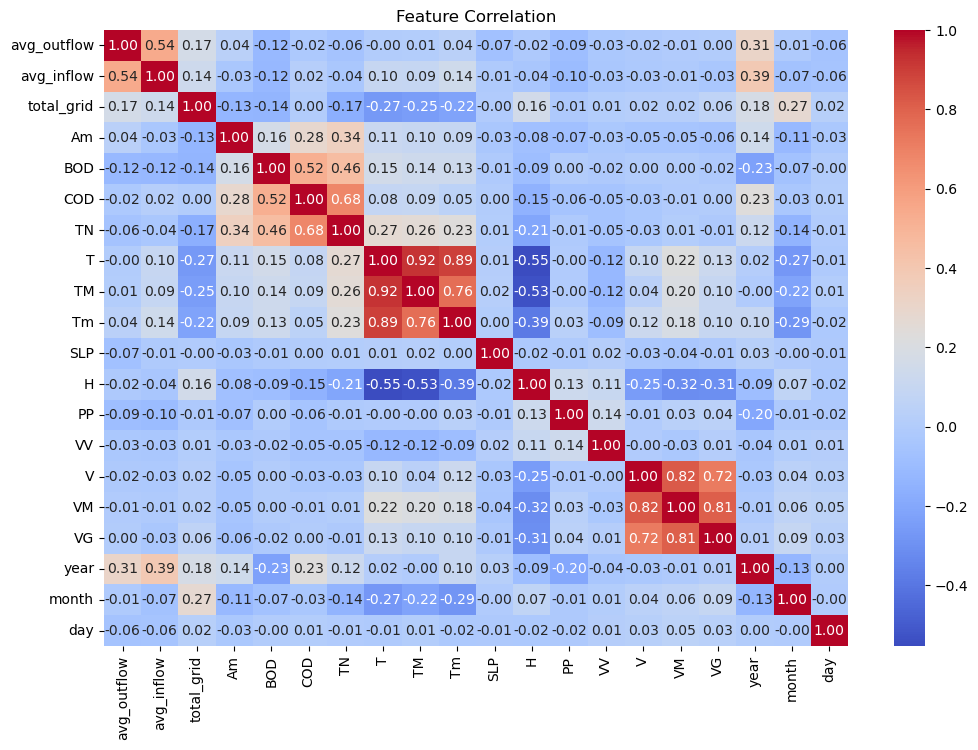


Model: Logistic Regression (Scratch)
Accuracy: 0.9133574007220217
F1 Score: 0.9104477611940298
Confusion Matrix:
 [[131   7]
 [ 17 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       138
           1       0.95      0.88      0.91       139

    accuracy                           0.91       277
   macro avg       0.92      0.91      0.91       277
weighted avg       0.92      0.91      0.91       277


Model: Logistic Regression (sklearn)
Accuracy: 0.9747292418772563
F1 Score: 0.9745454545454545
Confusion Matrix:
 [[136   2]
 [  5 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       138
           1       0.99      0.96      0.97       139

    accuracy                           0.97       277
   macro avg       0.97      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277


Model: K-Nearest Neig

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


file_path = "Data-Melbourne_F.csv"
df = pd.read_csv(file_path)


df.columns = [ "avg_outflow", "avg_inflow", "total_grid", "Am", "BOD", "COD", "TN", "T", "TM", "Tm", "SLP", "H", "PP", "VV", "V", "VM", "VG", "year", "month", "day"]

print(df.head())
print(df.info())


print("Missing values per column:\n", df.isnull().sum())


imputer = SimpleImputer(strategy='mean')
df.iloc[:, 1:] = imputer.fit_transform(df.iloc[:, 1:])


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Define the target variable
df['target'] = (df['avg_outflow'] > df['avg_outflow'].median()).astype(int)

# Splitting features and target
X = df.drop(columns=[ 'target'])
y = df['target']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.theta) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Gradient descent
            dw = (1 / len(y)) * np.dot(X.T, (predictions - y))
            db = (1 / len(y)) * np.sum(predictions - y)
            
            self.theta -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Training Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)
y_pred_lr_scratch = log_reg_scratch.predict(X_test)

# Logistic Regression using sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Hyperparameter Tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

# Hyperparameter Tuning for Decision Tree
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

# Hyperparameter Tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Hyperparameter Tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.best_estimator_.predict(X_test)

# Model Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate models
evaluate_model(y_test, y_pred_lr_scratch, "Logistic Regression (Scratch)")
evaluate_model(y_test, y_pred_lr, "Logistic Regression (sklearn)")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")
